In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb


In [4]:
import random

In [6]:
np.random.seed(42)

In [7]:
data_size = 1000

In [8]:
# Generate features
Location = np.random.choice(['Urban', 'Suburban', 'Rural'], size=data_size)
HouseSize = np.random.randint(500, 5000, size=data_size)  # in square feet
Bedrooms = np.random.randint(1, 6, size=data_size)
Bathrooms = np.random.randint(1, 4, size=data_size)
YearBuilt = np.random.randint(1900, 2023, size=data_size)
Garage = np.random.choice([0, 1], size=data_size, p=[0.3, 0.7])  # 30% without garage
HasPool = np.random.choice([0, 1], size=data_size, p=[0.8, 0.2])  # 20% with pool

In [9]:
BasePrice = 50000
PricePerSqFt = 150
PricePerBedroom = 10000
PricePerBathroom = 8000
GaragePremium = 15000
PoolPremium = 20000

In [10]:
SalePrice = (
    BasePrice +
    (HouseSize * PricePerSqFt) +
    (Bedrooms * PricePerBedroom) +
    (Bathrooms * PricePerBathroom) +
    (Garage * GaragePremium) +
    (HasPool * PoolPremium) +
    np.random.normal(0, 20000, size=data_size)  # Adding noise
)


In [11]:
# Combine into a DataFrame
data = pd.DataFrame({
    'Location': Location,
    'HouseSize': HouseSize,
    'Bedrooms': Bedrooms,
    'Bathrooms': Bathrooms,
    'YearBuilt': YearBuilt,
    'Garage': Garage,
    'HasPool': HasPool,
    'SalePrice': SalePrice
})

In [12]:
data.to_csv('synthetic_house_prices.csv', index=False)
print("Synthetic dataset created and saved as 'synthetic_house_prices.csv'")

Synthetic dataset created and saved as 'synthetic_house_prices.csv'


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   1000 non-null   object 
 1   HouseSize  1000 non-null   int64  
 2   Bedrooms   1000 non-null   int64  
 3   Bathrooms  1000 non-null   int64  
 4   YearBuilt  1000 non-null   int64  
 5   Garage     1000 non-null   int64  
 6   HasPool    1000 non-null   int64  
 7   SalePrice  1000 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 62.6+ KB


In [17]:
# Handle missing values (advanced techniques for numerical and categorical features)
# Filling missing numerical values with median
num_features = data.select_dtypes(include=['int64', 'float64']).columns
for feature in num_features:
    data[feature] = data[feature].fillna(data[feature].median())


In [18]:
cat_features = data.select_dtypes(include=['object']).columns
for feature in cat_features:
    data[feature] = data[feature].fillna(data[feature].mode()[0])

In [19]:
# Feature Engineering (example of creating new features)
data['TotalSF'] = data['HouseSize']

In [21]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
data = pd.get_dummies(data, drop_first=True)

In [22]:
target = 'SalePrice'
X = data.drop(columns=[target])
y = data[target]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
y_pred = xgb_model.predict(X_test)

In [31]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [32]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 18600.080042849266
Mean Squared Error (MSE): 547376197.1625359
Root Mean Squared Error (RMSE): 23396.072259303182
R-squared (R2): 0.9842671470710272


In [33]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

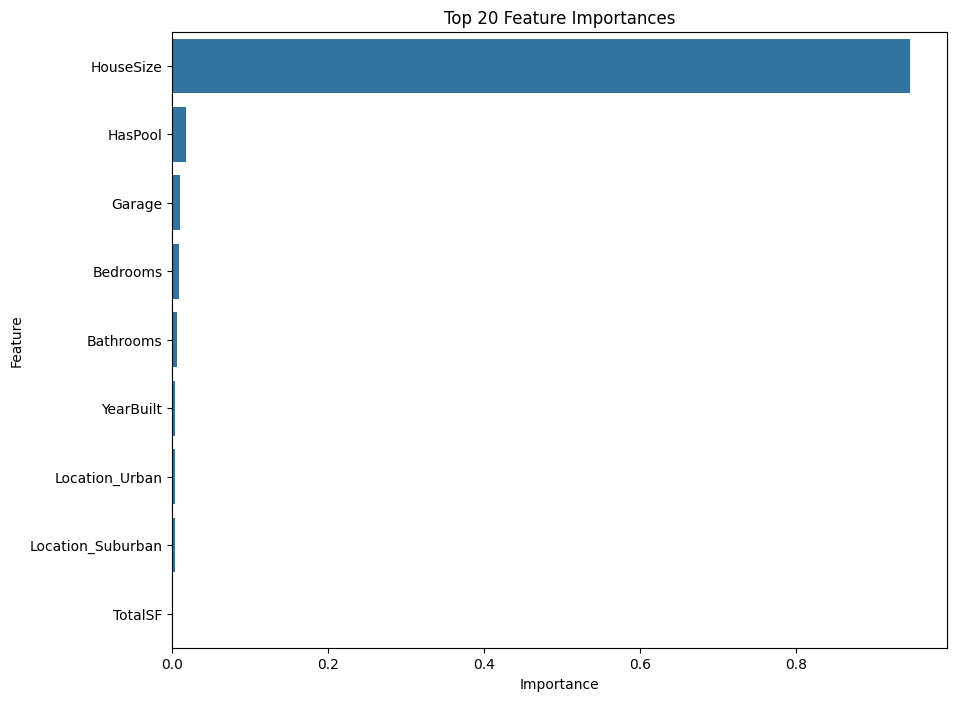

In [34]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

In [35]:
import joblib
joblib.dump(xgb_model, 'house_price_model.pkl')

['house_price_model.pkl']

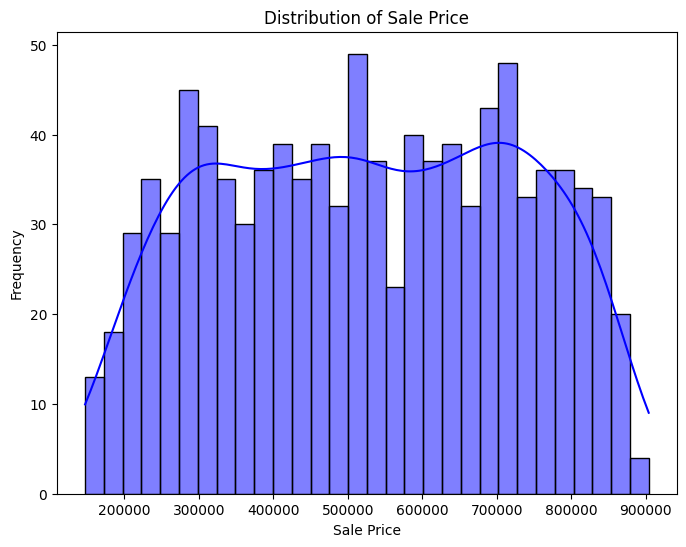

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(data['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

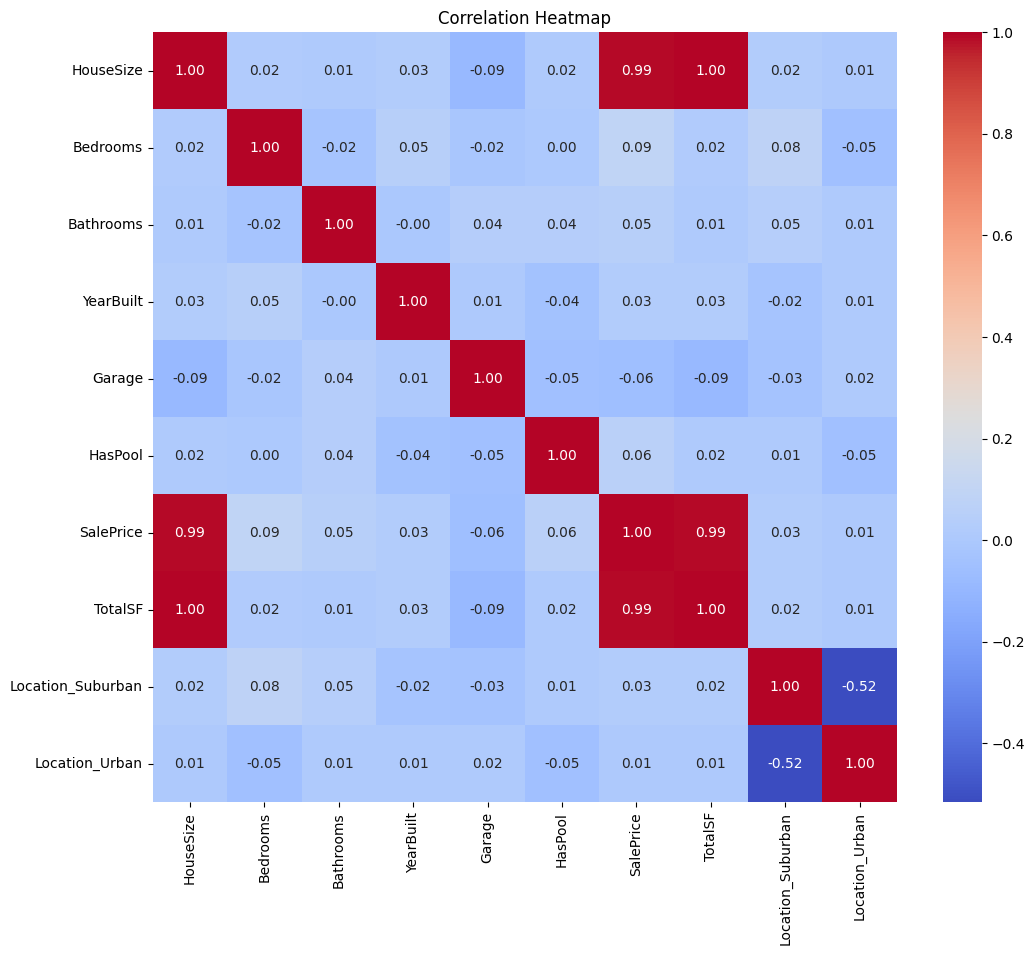

In [37]:
plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

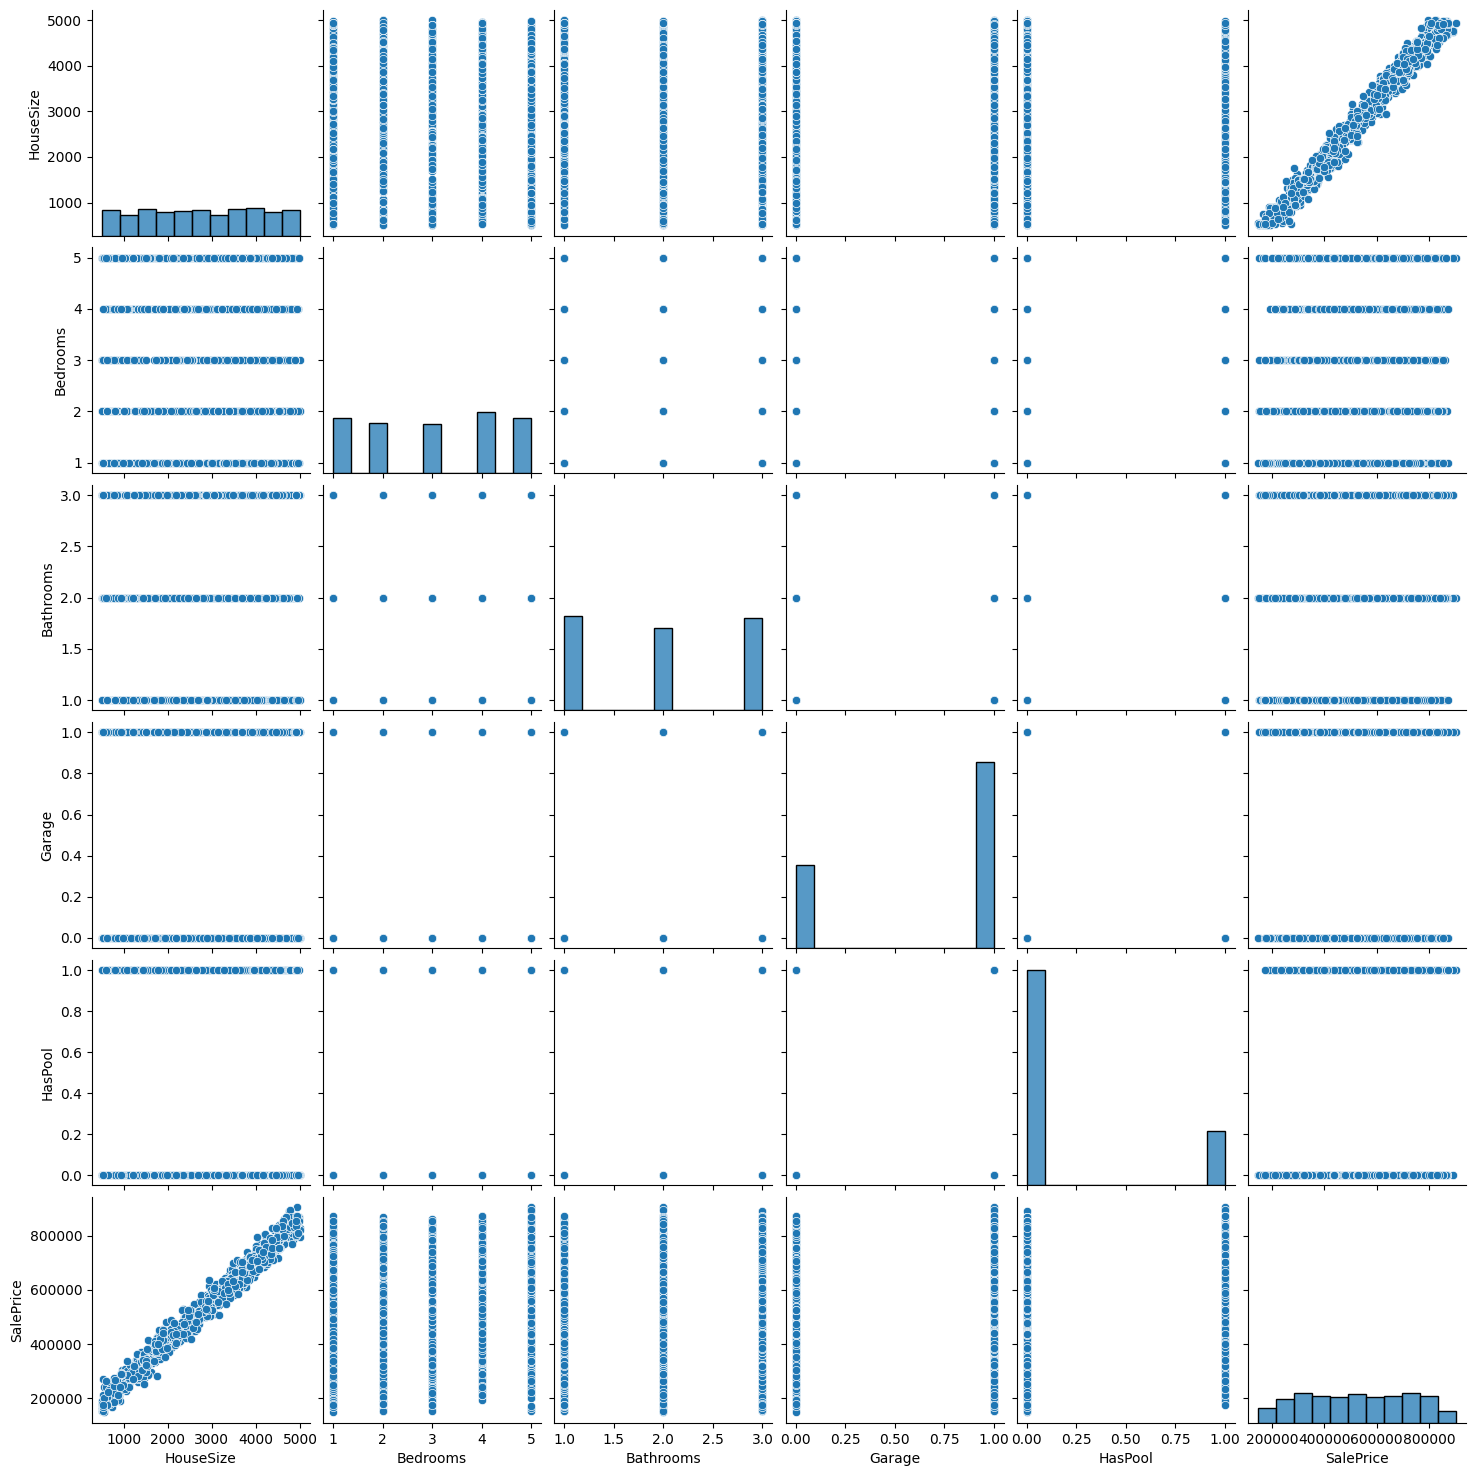

In [38]:
selected_features = ['HouseSize', 'Bedrooms', 'Bathrooms', 'Garage', 'HasPool', 'SalePrice']
sns.pairplot(data[selected_features])
plt.show()

In [40]:
import joblib
joblib.dump(xgb_model, 'house_price_model.pkl')

['house_price_model.pkl']

In [45]:
predictions = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(predictions.head())



      Actual Price  Predicted Price
521  172014.310670     167649.78125
737  793271.584433     803218.81250
740  659787.041170     665939.37500
660  464527.284079     519837.21875
411  687281.273534     664635.43750


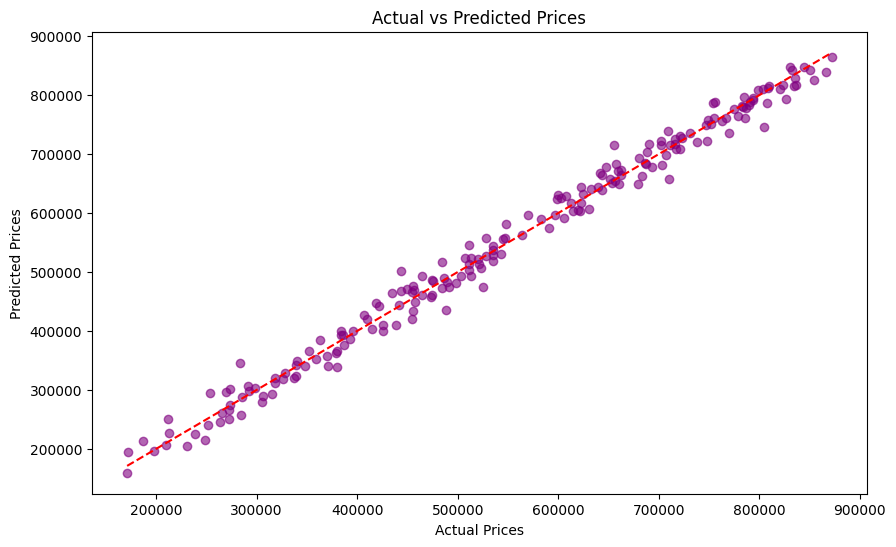

In [47]:
# Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
